

# Project: Investigate a Dataset (Analysing TMDB Movie Data )

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **TMDB Movie Data**: This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue .
>
> **Questions :**
>
> * Whats is the most movie have revenues?
> 
> * what is the relation between geners and revenues ?
> 
> * whitch director contribute in most of them ?
>
> * whitch movie make profit ? max profit? min profit?


In [ ]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
tmdb_df=pd.read_csv("tmdb-movies.csv")
tmdb_df.head()

In [ ]:
#review columns 
tmdb_df.info()

In [ ]:
# check is there any duplication
tmdb_df.duplicated().value_counts()

In [ ]:
#
tmdb_df.describe()

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)
> * Remove duplicate Data
> * Some columns we didnot need them [id,imdb_id,popularity]
> * Change data type of release_date  to be date time
> * Change data type of budget_adj and revenue_adj to be Integer as no need for fractions in millions no.
> * Although budget,revenue & budget_adj,revenue_adj has the same information but i will keep both of them as
we need budget,revenue as basic data and need budget_adj,revenue_adj for statistics purboses .
> * Drop all Rows whitch has budget_adj,revenue_adj less than 1000$  as the data seems to be wrong .
> * Some movies run time = 0 but we will do nothing as this column will be removed with rows with 0 budget .

In [ ]:
# Make copy of data to clean
tmdb_df_cleaned=tmdb_df.copy()

In [ ]:
#Drop duplicate values
tmdb_df_cleaned.drop_duplicates(inplace=True)

In [ ]:
#drop columns that i will not use  [id,imdb_id,popularity]
tmdb_df_cleaned.drop(columns=['id','imdb_id','popularity'],inplace=True)

In [ ]:
tmdb_df_cleaned.head(2)

In [ ]:
#Change Data type of  release_date to date time
tmdb_df_cleaned['release_date']=pd.to_datetime(tmdb_df_cleaned['release_date'])
tmdb_df_cleaned.info()

In [ ]:
tmdb_df_cleaned.head(2)

In [ ]:
#Change data type of budget_adj and revenue_adj to be Integer as no need for fractions in millions no.
col=['budget_adj','revenue_adj']
tmdb_df_cleaned[col]=tmdb_df_cleaned[col].astype(int)
tmdb_df_cleaned.info()

In [ ]:
tmdb_df_cleaned.head(2)

In [ ]:
# drop all data >1000$ in budget_adj and revenue_adj
tmdb_df_cleaned=tmdb_df_cleaned[(tmdb_df_cleaned['budget_adj']>1000) & (tmdb_df_cleaned['revenue_adj']>1000)]
tmdb_df_cleaned.info()

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Whats is the The highest revenue and lowest movie has revenues?)

In [98]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
tmdb_df_cleaned[tmdb_df_cleaned['revenue_adj']==tmdb_df_cleaned['revenue_adj'].max()]

,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
9806,7000000,470654000,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,http://www.jaws25.com/,Steven Spielberg,Don't go in the water.,fishing|atlantic ocean|bathing|shipwreck|polic...,An insatiable great white shark terrorizes the...,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,1975-06-18,1415,7.3,1975,28362748,1907005841


In [114]:
tmdb_df_cleaned['revenue_adj'].describe()

count    3.815000e+03
mean     1.357043e+08
std      2.017830e+08
min      1.840000e+03
25%      1.906670e+07
50%      6.244814e+07
75%      1.646599e+08
max      1.907006e+09
Name: revenue_adj, dtype: float64

In [99]:
tmdb_df_cleaned[tmdb_df_cleaned['revenue_adj']==tmdb_df_cleaned['revenue_adj'].min()]

,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4668,1500000,1938,Best Man Down,Justin Long|Jess Weixler|Tyler Labine|Addison ...,NaN,Ted Koland,NaN,NaN,A newlywed couple cancels their honeymoon and ...,90,Comedy|Drama,KODA Entertainment,2012-10-20,39,5.9,2012,1424616,1840


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EBCDC91C10>,
      dtype=object)

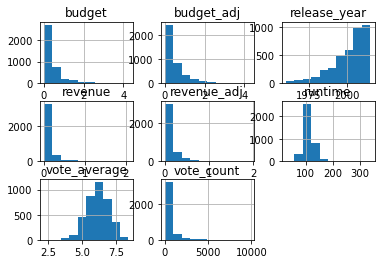

In [102]:
tmdb_df_cleaned.hist()

In [145]:
tmdb_temp=pd.DataFrame()
tmdb_df_cleaned.groupby(tmdb_df_cleaned['revenue_adj'].nlargest(10),'production_companies')


ValueError: No axis named production_companies for object type <class 'pandas.core.frame.DataFrame'>

### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!